In [1]:
import copy
import warnings 
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
from sklearn.exceptions import FitFailedWarning,ConvergenceWarning
warnings.filterwarnings('ignore',category=FitFailedWarning)
warnings.filterwarnings('ignore',category=ConvergenceWarning)

In [3]:
data = pd.read_csv('datasets/HousePricePredictionRegression/data.csv',sep=',')

In [4]:
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


&nbsp;

## Analise dos dados

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


> Features passaram por normalização|padronização

In [7]:
data.isna().nunique()

date             1
price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
street           1
city             1
statezip         1
country          1
dtype: int64

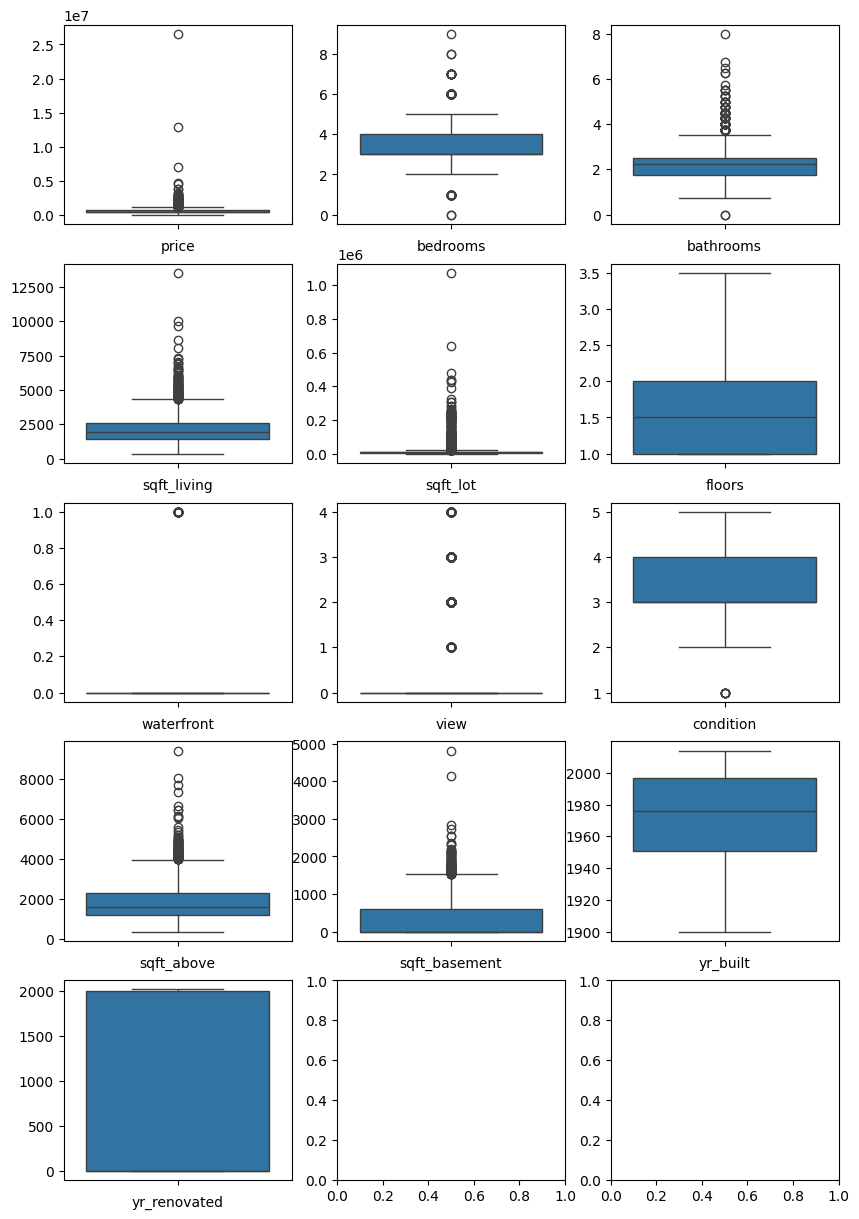

In [8]:
box = data.select_dtypes(exclude=['object'])

fig , ax  = plt.subplots(5,3,figsize=(10,15))
columns   = box.columns
for coluna, axis in zip(columns,ax.flatten()):
    sea.boxplot(box[coluna],ax=axis)
    axis.set_ylabel('')
    axis.set_xlabel(coluna)

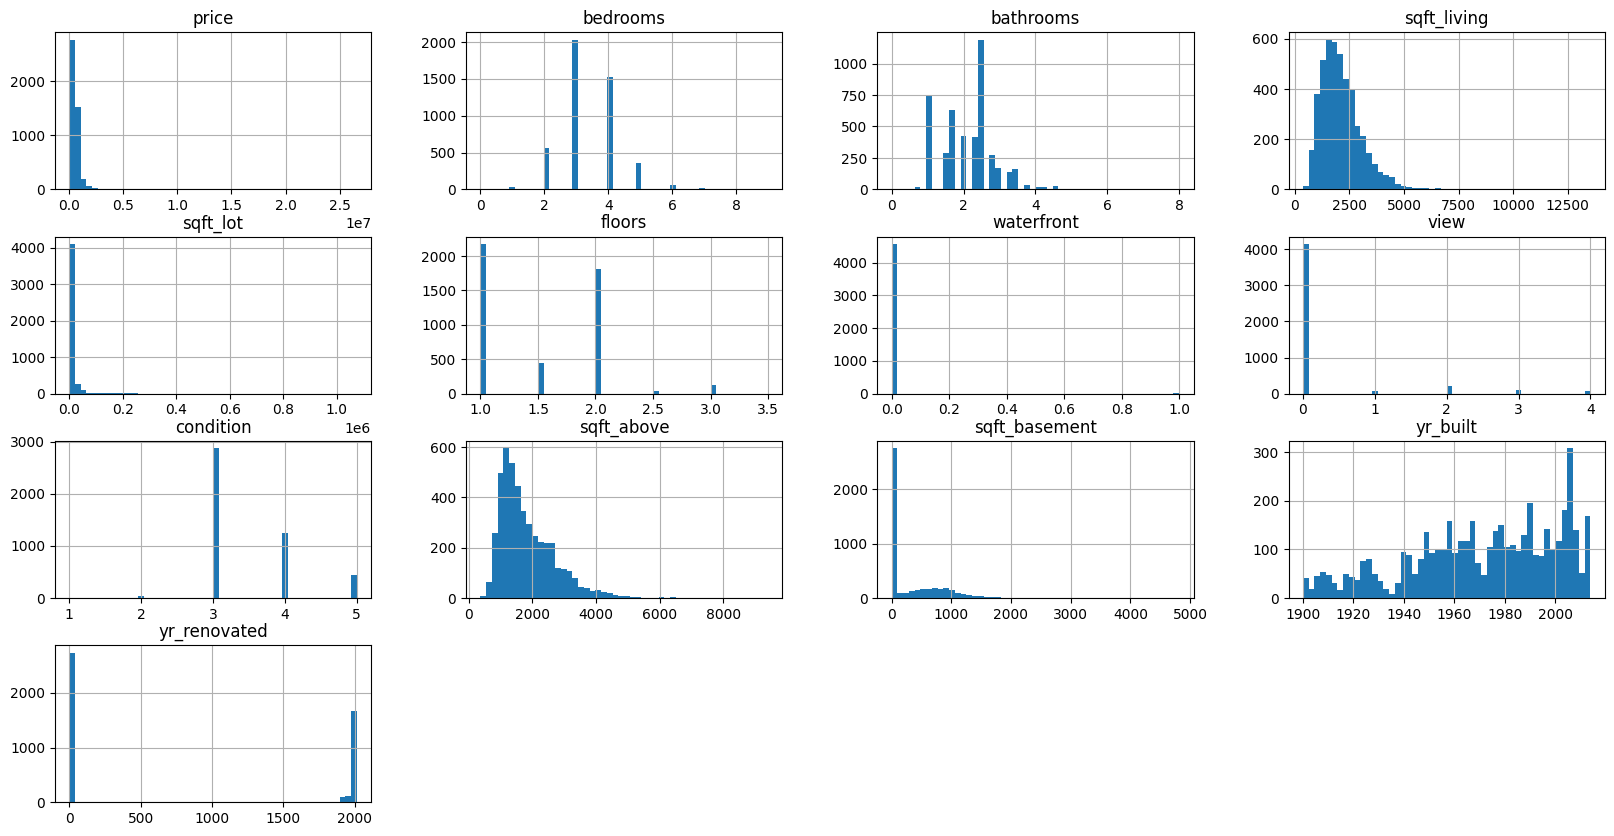

In [9]:
data.select_dtypes(exclude=['object']).hist(bins=50,figsize=(20,10))
plt.show()

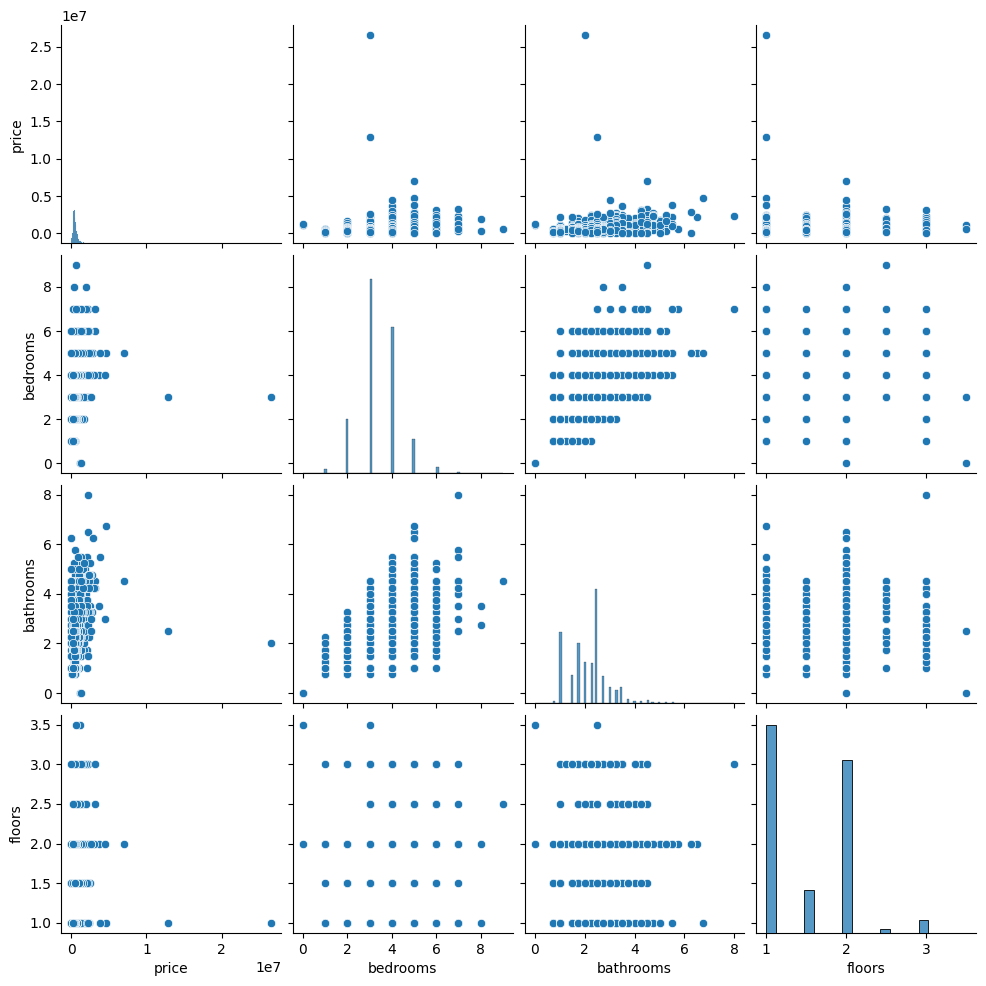

In [10]:
sea.pairplot(data.select_dtypes(exclude=['object']))
plt.show()

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


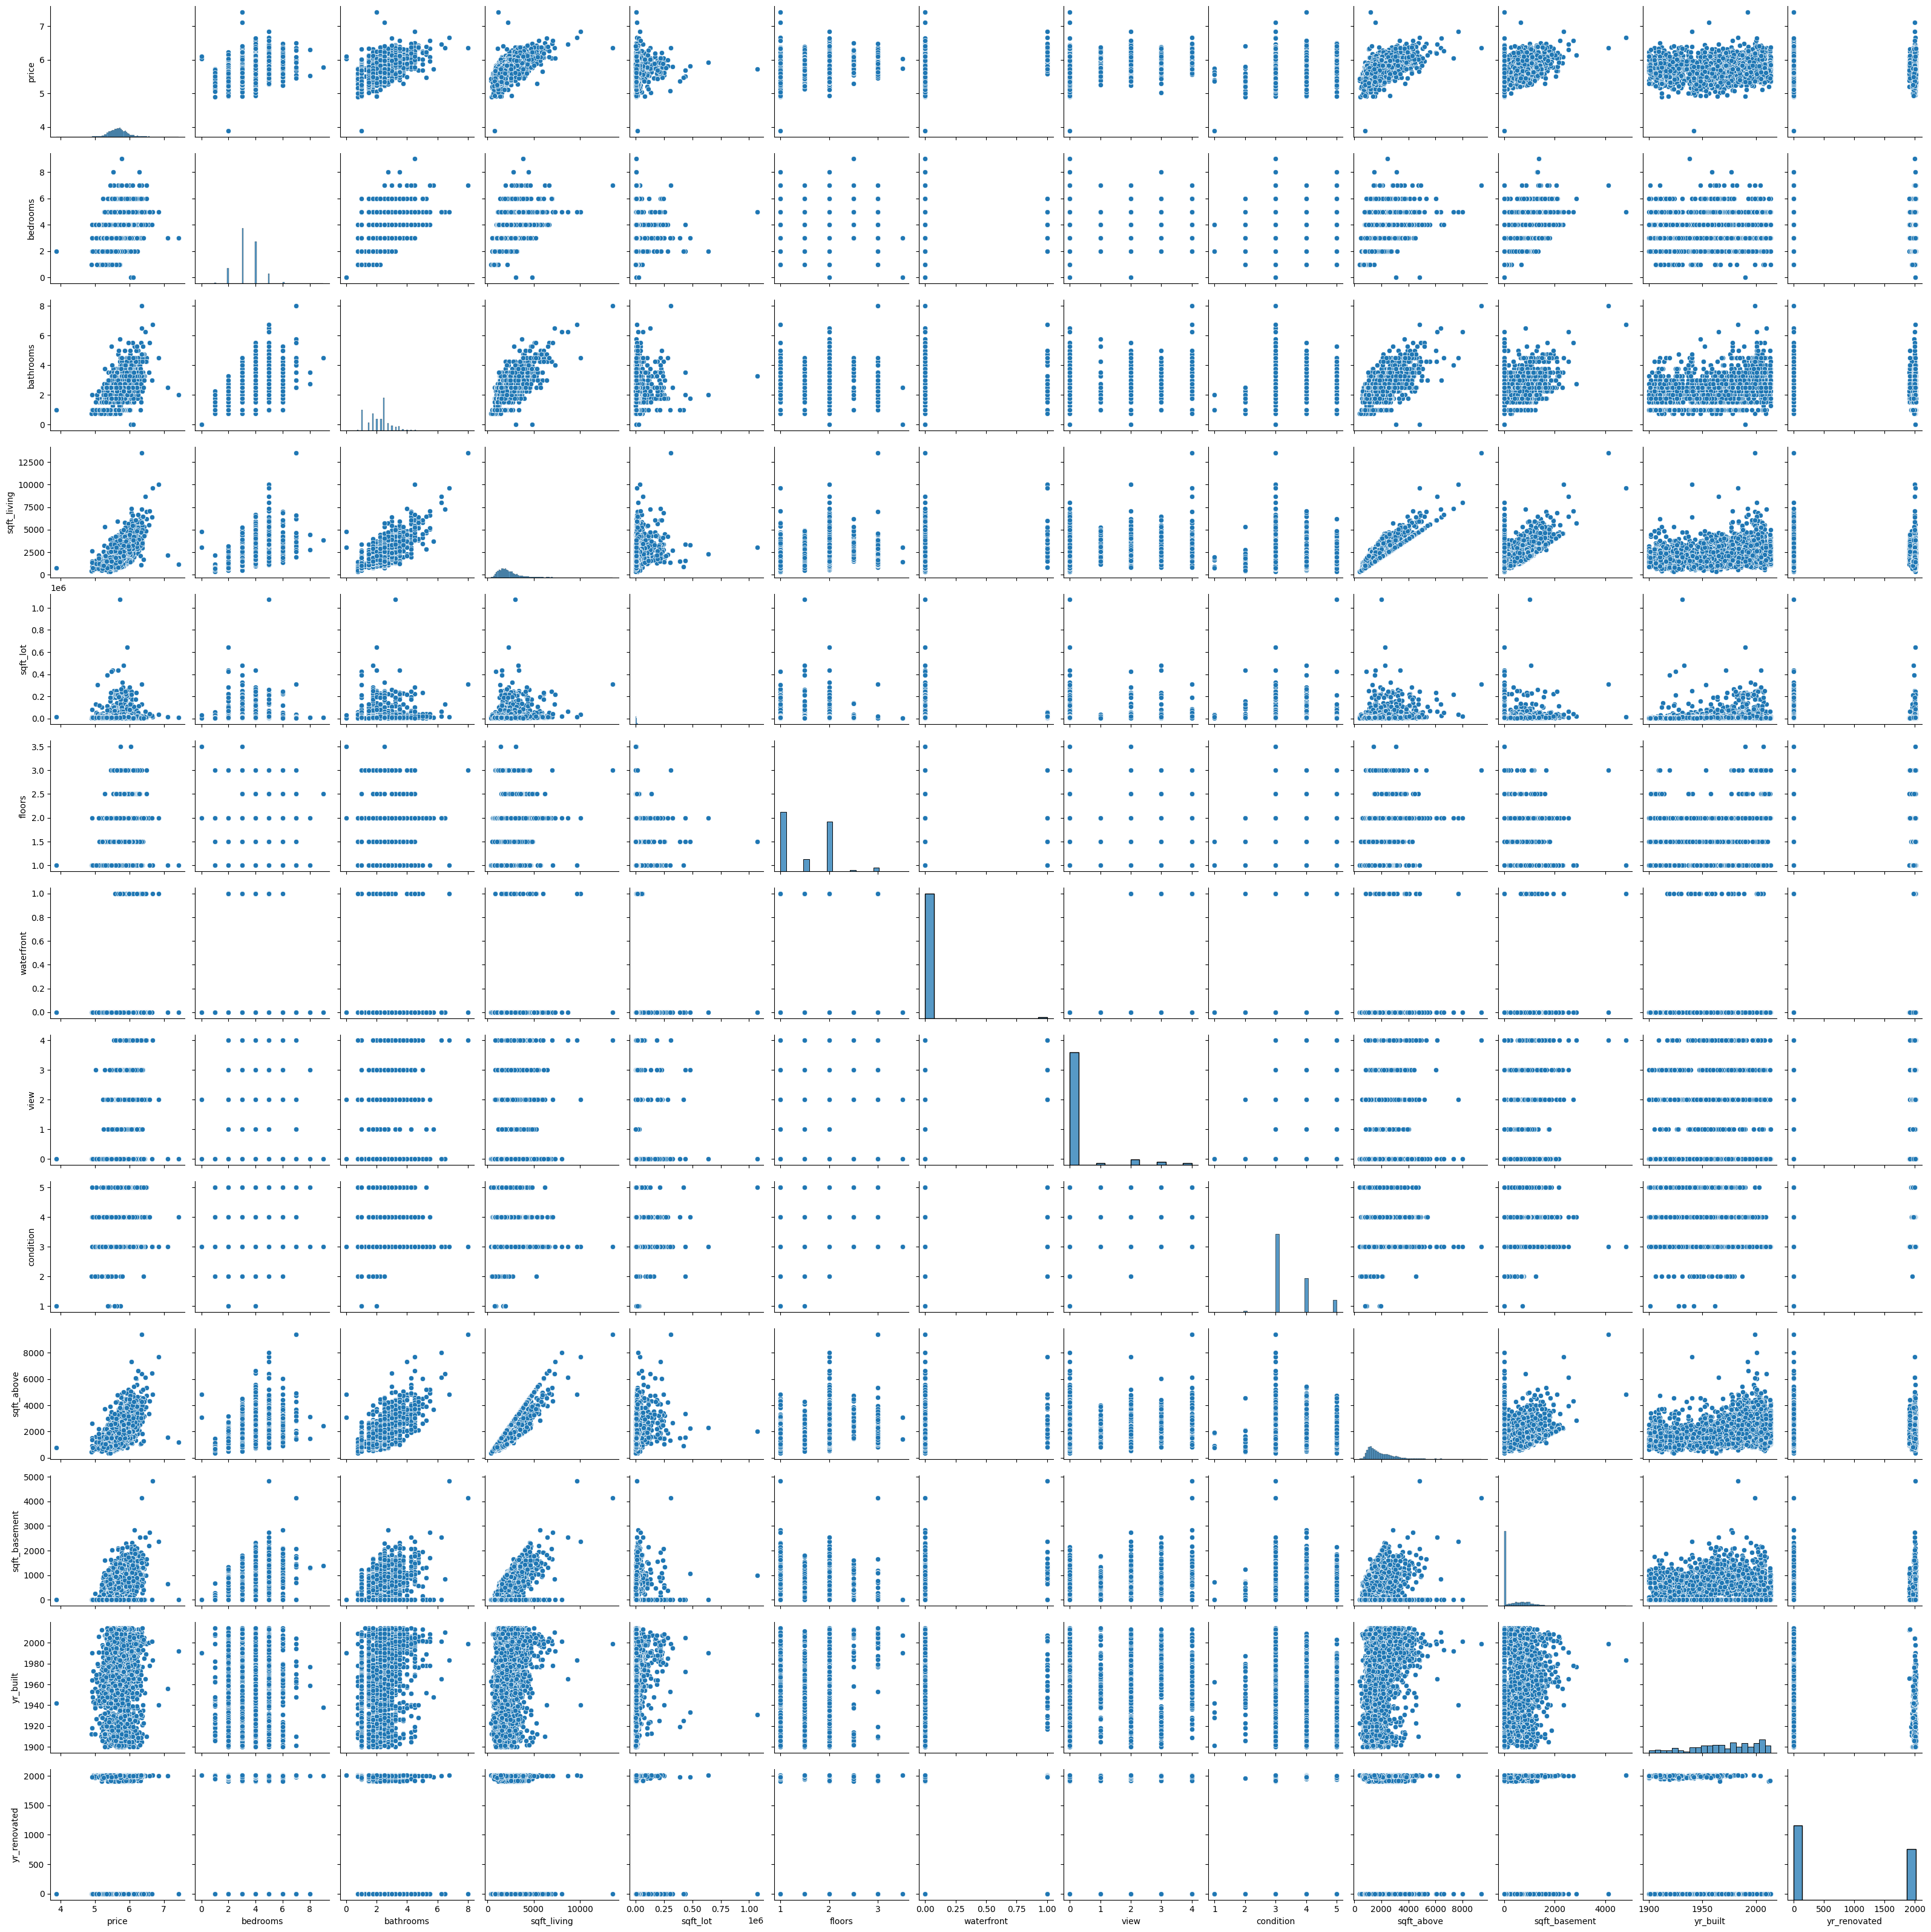

In [11]:
datacola = data.copy()

datacola['price'] = np.log10(datacola['price'])
sea.pairplot(datacola.select_dtypes(include=['float','int']))
plt.show()

In [12]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

> atributos `country` , `street` são daddos redundates
* `country` = quantidade de valores unicos 1 (data.shape = (4600))
* `street`  = quantidade de valores unicos 4525 (data.......(4600)) não tem como agrupar esses dados e ver se a relação de preço e rua 

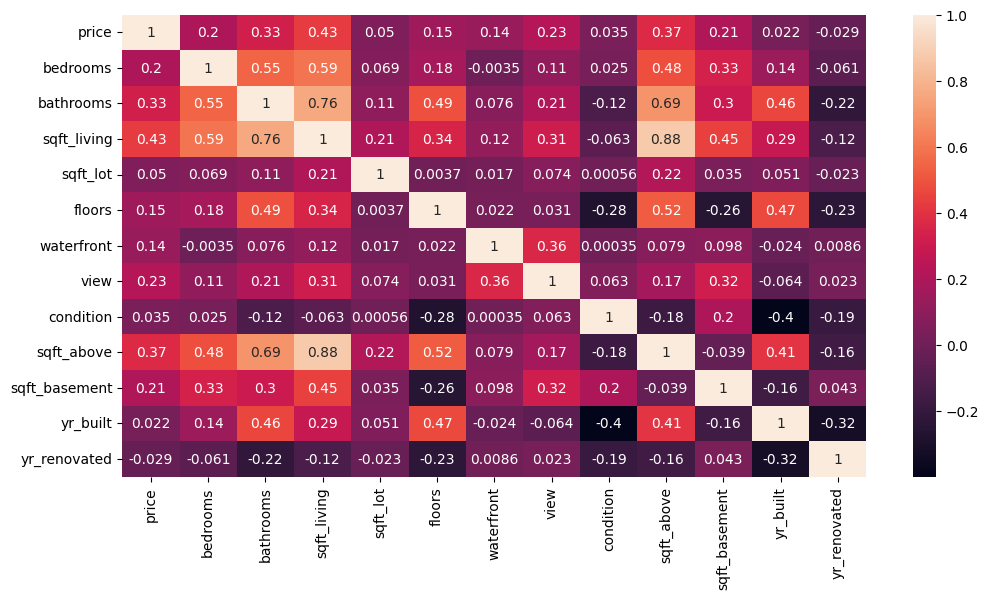

In [13]:
plt.figure(figsize=(12,6))
sea.heatmap(data.select_dtypes(exclude='object').corr(),annot=True)
plt.show()

&nbsp;

## Pré-processamento

In [3]:
from sklearn.base          import BaseEstimator,TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

In [4]:
class RemovendoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.drop(columns=self.columns,axis=0)

In [5]:
class CriandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.columns = ['date','yr_built','yr_renovated']

    def fit(self,X,y=None):
        return self
    
    def transform(self,X:pd.DataFrame,y=None):

        X[self.columns[0]] = pd.to_datetime(X[self.columns[0]])
        X['YearHouse' ] = X[self.columns[0]].dt.year - abs( X[self.columns[1]] )
        return X

In [6]:
class TransformancaoLogaritma(BaseEstimator,TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self,X,y=None):
        return self
    
    def transform(self,X:pd.DataFrame,y=None):
        X = X.drop(index=X.loc[X['price']==0].index,axis=1) 
        X['price'] = np.log10(X['price'])
        return X
    

class TransformancaoLogaritmaX(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list):
        self.columns = columns

    def fit(self,X,y=None):
        return self
    
    def transform(self,X:pd.DataFrame,y=None):
        for column in self.columns:
            X[column] = np.log10(X[column])
        return X

In [7]:
class TransformandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list|str):
        self.columns = columns

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        if (type(self.columns) == list):
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns])
        else:
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns].values)
        return X   

In [8]:
class Padronizacao(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):  
        if ( type(self.columns) == list ):
            X[self.columns]   = StandardScaler().fit_transform(X[self.columns])
        else:
            X[[self.columns]] = StandardScaler().fit_transform(X[[self.columns]])
        return X

In [9]:
class Teto(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):
        X[self.columns] = np.floor(X[self.columns].values)
        return X

In [10]:
class Dummies(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns 

    def fit(self,X,y=None):
        return self
    
    def transform(self, X:pd.DataFrame):
        return pd.get_dummies(X,columns=self.columns,dtype=int)

&nbsp;

## Previsão

In [11]:
train = pd.read_csv('datasets/HousePricePredictionRegression/data.csv')
test  = pd.read_csv('datasets/HousePricePredictionRegression/output.csv')

In [12]:
from sklearn.metrics      import *
from sklearn.pipeline     import Pipeline
from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge,ElasticNet
from sklearn.svm          import SVR
from sklearn.ensemble     import VotingRegressor
from sklearn.base         import clone
from sklearn.model_selection import (
    StratifiedShuffleSplit,
    train_test_split,
    cross_val_score ,
    GroupKFold      ,
    GridSearchCV    ,
    KFold
)

In [13]:
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor       import PredictionError

In [14]:
pipeline = Pipeline(
    steps=[
        ('CriandoAtributos'    ,CriandoAtributos()),
        ('Removendo preço'     ,TransformancaoLogaritma()),
        ('Distribuiçao Normal' ,TransformancaoLogaritmaX(['sqft_lot','sqft_above','sqft_living'])),
        ('Padronização'        ,Padronizacao(['sqft_living','sqft_lot','floors','sqft_above','sqft_basement','YearHouse','yr_renovated'])),
        ('RemovendoAtributos'  ,RemovendoAtributos(['country', 'street','statezip','date','yr_built'])),
        ('Teto'                ,Teto('bathrooms')),
        ('Dummies'             ,Dummies(['bedrooms','bathrooms','waterfront','view','condition','city']))
        ]
)

In [15]:
dataset = pd.concat([train,test],axis=0)
dataset = pipeline.fit_transform(dataset)

In [16]:
X = dataset.drop(columns='price',axis=0)
Y = dataset['price']

In [17]:
Y.describe()

count    9102.000000
mean        5.674041
std         0.235717
min         3.892095
25%         5.513460
50%         5.667453
75%         5.817896
max         7.424718
Name: price, dtype: float64

In [18]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y,test_size=0.25,random_state=42)

&nbsp;

### Gradiente descendente estocastico regressor

In [30]:
regSGB = SGDRegressor()
regSGB.fit(xtrain,ytrain)

SGDRegressor()

In [31]:
predSGB = regSGB.predict(xtest)

In [32]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSGB))
print("Mean Squared error...:",mean_squared_error(ytest,predSGB))
print("r2 score.............:",r2_score(ytest,predSGB))

Mean Absolute error..: 0.096955881136532
Mean Squared error...: 0.023160148836118652
r2 score.............: 0.5760868047062236


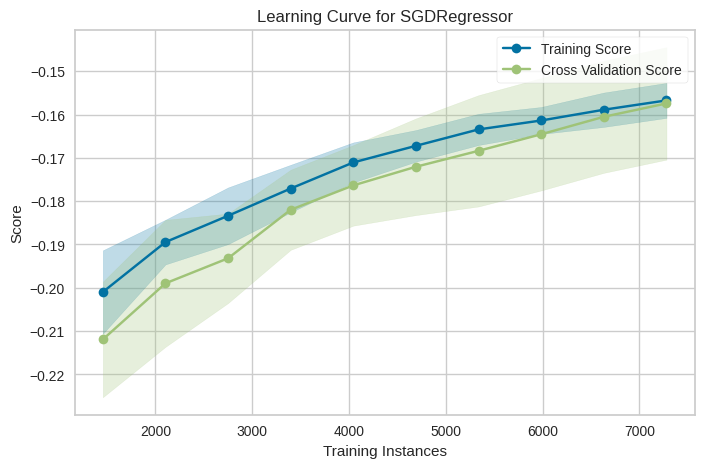

In [33]:
plt.figure(figsize=(8,5))
learning = LearningCurve(regSGB,scoring='neg_root_mean_squared_error',train_sizes=np.linspace(0.2,1,10))
learning.fit(X,Y)
learning.show()
plt.show()

In [34]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(regSGB)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.15153 | mean_absolute_error: 0.096386 | r2 : 0.569458713912286
Fold 2 | mean_squared_error : 0.15857 | mean_absolute_error: 0.098715 | r2 : 0.545500551676596
Fold 3 | mean_squared_error : 0.15197 | mean_absolute_error: 0.099352 | r2 : 0.5727002531275982
Fold 4 | mean_squared_error : 0.15356 | mean_absolute_error: 0.097394 | r2 : 0.5802039976622216
Fold 5 | mean_squared_error : 0.17814 | mean_absolute_error: 0.108008 | r2 : 0.4606808350260515


In [35]:
scores =cross_val_score(clone(regSGB),X,Y,cv=kfold,scoring='r2')
print('cross_val_score........:',scores)
print('cross_val_score_mean...:',scores.mean())

cross_val_score........: [0.55850942 0.53970441 0.57570619 0.57833954 0.44079837]
cross_val_score_mean...: 0.5386115861235158


&nbsp;

### Regressão Linear

In [36]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [37]:
pred = reg.predict(xtest)

In [38]:
print("Mean Absolute error..:",mean_absolute_error(ytest,pred))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,pred)))
print("r2 score.............:",r2_score(ytest,pred))

Mean Absolute error..: 0.08146145045268453
Mean Squared error...: 0.12505518543244262
r2 score.............: 0.7137542822965222


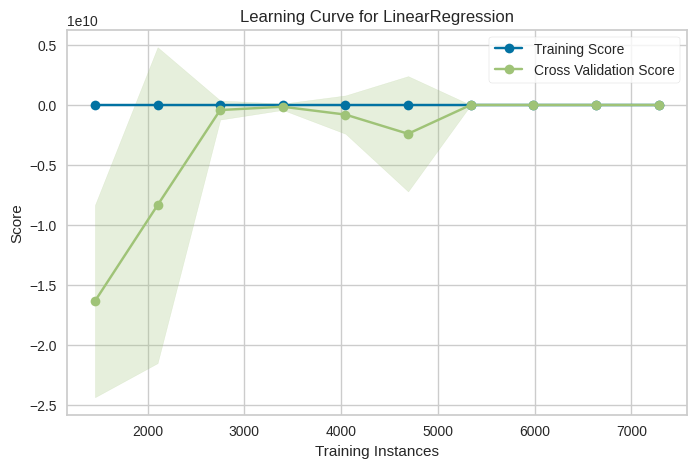

In [39]:
plt.figure(figsize=(8,5))
learning = LearningCurve(reg,scoring='neg_root_mean_squared_error',train_sizes=np.linspace(0.2,1,10))
learning.fit(X,Y)
learning.show()
plt.show()

In [40]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(reg)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | R2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.13120 | mean_absolute_error: 0.090409 | R2 : 0.6772467348025961
Fold 2 | mean_squared_error : 0.11959 | mean_absolute_error: 0.080754 | R2 : 0.741487757579524
Fold 3 | mean_squared_error : 636135903.66384 | mean_absolute_error: 21087699.949589 | R2 : -7.486739242872668e+18
Fold 4 | mean_squared_error : 0.12358 | mean_absolute_error: 0.085348 | R2 : 0.7281100707938959
Fold 5 | mean_squared_error : 0.13269 | mean_absolute_error: 0.085640 | R2 : 0.7007476398935133


In [41]:
scores =cross_val_score(clone(reg),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [ 6.77246735e-01  7.41487758e-01 -7.48673924e+18  7.28110071e-01
  7.00747640e-01]
cross_val_score_mean..: -1.4973478485745336e+18


&nbsp;

### SVM 

In [42]:
svmr = SVR(kernel='poly',degree=2,coef0=10)
svmr.fit(xtrain,ytrain)

SVR(coef0=10, degree=2, kernel='poly')

In [43]:
predSVMR = svmr.predict(xtest)

In [44]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSVMR))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predSVMR)))
print("r2 score.............:",r2_score(ytest,predSVMR))

Mean Absolute error..: 0.0769826702795049
Mean Squared error...: 0.1166760582124905
r2 score.............: 0.7508280871790993


In [45]:
scores =cross_val_score(clone(svmr),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [0.75115698 0.76988831 0.77484499 0.75976452 0.72804178]
cross_val_score_mean..: 0.7567393146905004


&nbsp;

### Ridge

In [46]:
params = dict(
    alpha  = np.linspace(1,1.9,8),
    solver = ['svd', 'cholesky']
)
gridRidge = GridSearchCV(estimator=Ridge(),param_grid=params,scoring='neg_mean_absolute_error')
gridRidge.fit(xtrain,ytrain)

print(gridRidge.best_estimator_)
print(gridRidge.best_score_)

Ridge(solver='svd')
-0.08268284274085301


In [47]:
ridge = gridRidge.best_estimator_
ridge.fit(xtrain,ytrain)

Ridge(solver='svd')

In [48]:
predRidge = ridge.predict(xtest)

In [49]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predRidge))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predRidge)))
print("r2 score.............:",r2_score(ytest,predRidge))

Mean Absolute error..: 0.0815839221713954
Mean Squared error...: 0.1252242937504595
r2 score.............: 0.7129795961284574


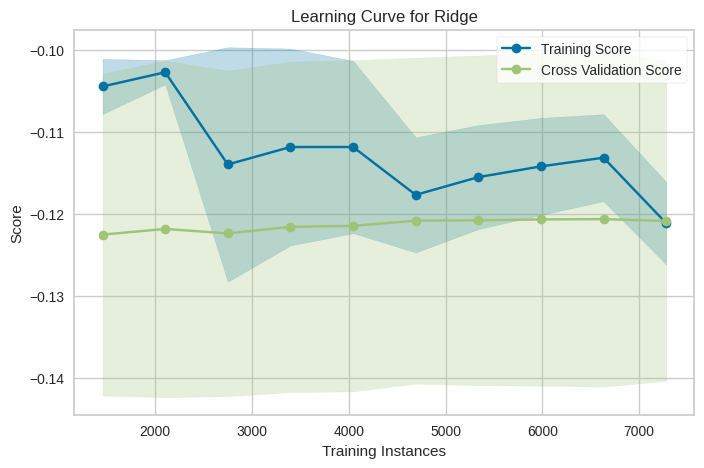

In [50]:
plt.figure(figsize=(8,5))
learning = LearningCurve(clone(ridge),scoring='neg_root_mean_squared_error',train_sizes=np.linspace(0.2,1,10))
learning.fit(X,Y)
learning.show()
plt.show()

In [51]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(ridge)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.12416 | mean_absolute_error: 0.082122 | r2 : 0.7109705583313194
Fold 2 | mean_squared_error : 0.11919 | mean_absolute_error: 0.080119 | r2 : 0.7432115004656143
Fold 3 | mean_squared_error : 0.11918 | mean_absolute_error: 0.082500 | r2 : 0.7371996443559623
Fold 4 | mean_squared_error : 0.11994 | mean_absolute_error: 0.081778 | r2 : 0.7439205513180216
Fold 5 | mean_squared_error : 0.13245 | mean_absolute_error: 0.084729 | r2 : 0.7018372569129665


In [52]:
scores = cross_val_score(clone(ridge),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [0.71097056 0.7432115  0.73719964 0.74392055 0.70183726]
cross_val_score_mean..: 0.7274279022767768


&nbsp;

### Elastic net

In [53]:
params = dict(
    alpha    = np.linspace(0.0001,0.1,10),
    l1_ratio = np.linspace(0.1,0.9,9)
)
gridElastic = GridSearchCV(ElasticNet(),param_grid=params,scoring='neg_mean_absolute_error')
gridElastic.fit(xtrain,ytrain)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [54]:
elastic = gridElastic.best_estimator_
elastic.fit(xtrain,ytrain)

ElasticNet(alpha=0.0001, l1_ratio=0.1)

In [55]:
predElastic = elastic.predict(xtest)

In [56]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predElastic))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predElastic)))
print("r2 score.............:",r2_score(ytest,predElastic))

Mean Absolute error..: 0.08156860422067205
Mean Squared error...: 0.12520186768592456
r2 score.............: 0.713082390267497


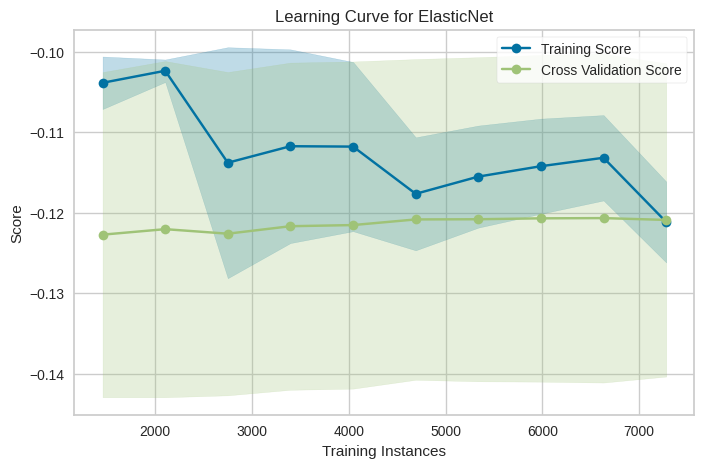

In [57]:
plt.figure(figsize=(8,5))
learning = LearningCurve(clone(elastic),scoring='neg_root_mean_squared_error',train_sizes=np.linspace(0.2,1,10))
learning.fit(X,Y)
learning.show()
plt.show()

In [58]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(elastic)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.12413 | mean_absolute_error: 0.082114 | r2 : 0.7110789809235699
Fold 2 | mean_squared_error : 0.11919 | mean_absolute_error: 0.080098 | r2 : 0.7432123867226461
Fold 3 | mean_squared_error : 0.11924 | mean_absolute_error: 0.082529 | r2 : 0.7369403472774023
Fold 4 | mean_squared_error : 0.12000 | mean_absolute_error: 0.081815 | r2 : 0.7436610117273297


Fold 5 | mean_squared_error : 0.13245 | mean_absolute_error: 0.084728 | r2 : 0.7018614905992915


In [59]:
scores =cross_val_score(clone(elastic),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [0.71107898 0.74321239 0.73694035 0.74366101 0.70186149]
cross_val_score_mean..: 0.7273508434500479


### Melhores
1. Reg
3. SVM
2. SGB Elastic

In [ ]:
regressor = VotingRegressor(
    estimators = [
        ('sgb',regSGB),
        ('svm',svmr),
        ('ridge',ridge),
        ('elastic',elastic)
    ]
)
regressor.fit(xtrain,ytrain)

In [61]:
predVoting = regressor.predict(xtest)

In [62]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predVoting))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predVoting)))
print("r2 score.............:",r2_score(ytest,predVoting))

Mean Absolute error..: 0.07936009365941302
Mean Squared error...: 0.12184256956425228
r2 score.............: 0.7282724406926722


In [63]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(regressor)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.12069 | mean_absolute_error: 0.079832 | r2 : 0.7268808542592646
Fold 2 | mean_squared_error : 0.11671 | mean_absolute_error: 0.078505 | r2 : 0.7537919405204678
Fold 3 | mean_squared_error : 0.11799 | mean_absolute_error: 0.081117 | r2 : 0.7424227760644619
Fold 4 | mean_squared_error : 0.11920 | mean_absolute_error: 0.080901 | r2 : 0.7470446774839753
Fold 5 | mean_squared_error : 0.13265 | mean_absolute_error: 0.084897 | r2 : 0.7009351486542656


## Rede neural

In [19]:
import keras 
import tensorflow as tf
from   functools import partial

2024-04-24 12:19:34.560176: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 12:19:34.885272: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 12:19:34.885327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 12:19:34.903384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 12:19:34.954845: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 12:19:34.956153: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [20]:
xtrain.shape

(6826, 81)

In [57]:
def Model():    
    Dense = partial(
        keras.layers.Dense,
        activation = keras.activations.elu,
        kernel_initializer = keras.initializers.he_normal
    )
    model = keras.models.Sequential(
        layers=[
            Dense(100),
            Dense(80),
            Dense(40),
            keras.layers.Dropout(rate=0.1),
            Dense(20),
            keras.layers.Dropout(rate=0.1),
            Dense(10),
            keras.layers.Dropout(rate=0.1),
            Dense(5),
            Dense(3),
            keras.layers.Dense(1, kernel_initializer=keras.initializers.he_normal)
        ]    
    )
    return model

In [58]:
model = Model()

model.compile(
    optimizer=keras.optimizers.RMSprop(momentum=0.9),
    loss=keras.losses.MSE,
)
stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(xtrain, ytrain, batch_size=32, epochs=20, validation_split=0.1, callbacks=[stopping])

Epoch 1/20
192/192 [==============================] - 2s 4ms/step - loss: 1.2695 - val_loss: 0.1588
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 0.0462
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0312
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.0449
Epoch 5/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0283 - val_loss: 0.0243
Epoch 6/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0248 - val_loss: 0.0248
Epoch 7/20
192/192 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0235
Epoch 8/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.0221
Epoch 9/20
192/192 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.0273
Epoch 10/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0219

<Axes: >

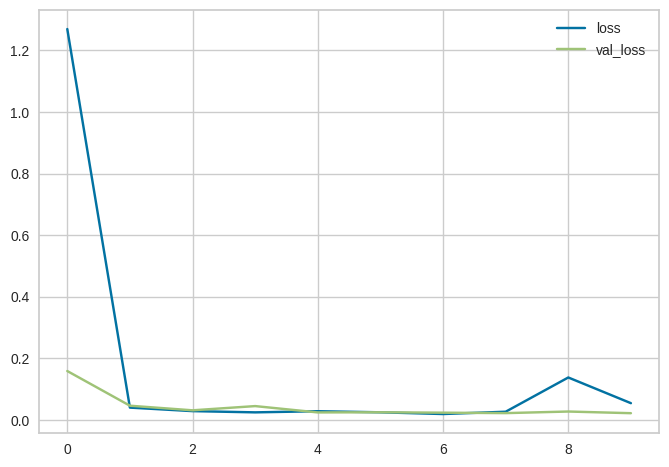

In [59]:
pd.DataFrame(history.history).plot()

In [60]:
pred = model.predict(xtest)

72/72 [==============================] - 0s 1ms/step


In [61]:
print("Mean Absolute error..:",mean_absolute_error(ytest,pred))
print("Mean Squared error...:",mean_squared_error(ytest,pred))
print("r2 score.............:",r2_score(ytest,pred))

Mean Absolute error..: 0.08743381667237111
Mean Squared error...: 0.017517073530318006
r2 score.............: 0.6822468520937429


In [62]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = model
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]
    
    stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

    foldreg.fit(xtrain, ytrain, batch_size=32, epochs=20, verbose=0, callbacks=[stopping])
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

57/57 [==============================] - 0s 1ms/step
Fold 1 | mean_squared_error : 0.12225 | mean_absolute_error: 0.081279 | r2 : 0.7197827102264442
57/57 [==============================] - 0s 1ms/step
Fold 2 | mean_squared_error : 0.11686 | mean_absolute_error: 0.078552 | r2 : 0.7531526623180674
57/57 [==============================] - 0s 1ms/step
Fold 3 | mean_squared_error : 0.10818 | mean_absolute_error: 0.076263 | r2 : 0.7834966665084178
57/57 [==============================] - 0s 1ms/step
Fold 4 | mean_squared_error : 0.10859 | mean_absolute_error: 0.075170 | r2 : 0.7900877121011378
57/57 [==============================] - 0s 1ms/step
Fold 5 | mean_squared_error : 0.12672 | mean_absolute_error: 0.088903 | r2 : 0.7270710026719777
